In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Possibly helpful numpy operations
testarr = 20 * np.random.rand(10, 2)
# Add 20 to each element of the 0th axis of testarr
testarr[:, 0] += 20
print(testarr)
# Create another array, then replace elements 5-10 (both axes) of testarr with the new array
newarr = -10 * np.random.rand(5, 2)
print(newarr)
testarr[5:10, :] = newarr
testarr

[[25.8279638  10.50302017]
 [37.04629424 12.36922462]
 [24.09032066 13.23634516]
 [20.05333353 16.42529772]
 [34.05324407 17.19273419]
 [20.16472434  1.48390979]
 [26.31307151 15.92147776]
 [28.22831129  1.76638593]
 [39.72717768 13.73279491]
 [20.44867902 17.64022017]]
[[-4.80734516 -3.71333356]
 [-8.80144318 -9.7304851 ]
 [-8.37396692 -9.70810384]
 [-7.8351419  -4.25625304]
 [-3.07537994 -4.27240102]]


array([[25.8279638 , 10.50302017],
       [37.04629424, 12.36922462],
       [24.09032066, 13.23634516],
       [20.05333353, 16.42529772],
       [34.05324407, 17.19273419],
       [-4.80734516, -3.71333356],
       [-8.80144318, -9.7304851 ],
       [-8.37396692, -9.70810384],
       [-7.8351419 , -4.25625304],
       [-3.07537994, -4.27240102]])

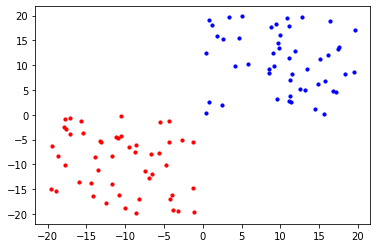

In [3]:
# Generate 2 groups of random 2d data
bgroup = 20 * np.random.rand(100, 2)
rgroup = -20 * np.random.rand(50, 2)
# Replace the second half of bgroup with rgroup
bgroup[50:100, :] = rgroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.show()

In [4]:
Kmean = KMeans(n_clusters = 2)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


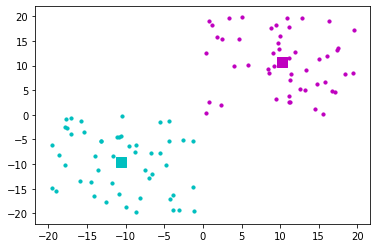

In [5]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(100):
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'c')
    else:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'm')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'm', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'c', marker='s')
plt.show()

In [27]:
# Label each data point with its closest centroid and sum point-to-centroid distances
# Recalculate centroids with mean cluster coordinates

# Our KMeans class
class KMemes:
    fitted = False
    labels_ = []
    centroids = []
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):
        if len(np.shape(array)) != 2:
            print("Error: bad array shape")
            return
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # labels has an int representing an index in centroids for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        for i in range(self.n_init):
            # Randomly select centroids
            self.centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            # TODO: CHANGE THIS SO THAT IT ONLY RUNS WHILE total_distance IS DECREASING (Elbow calculation)
            for j in range(100):
                total_distance = 0
                # Get the closest centroid for each data point
                for point in range(len(array)):
                    # Shortest distance from a centroid to the point
                    shortest_distance = sys.maxsize # infinity
                    for centroid in range(self.n_clusters):
                        current_distance = 0
                        # Calculate squared distance from centroid to point (computation efficiency)
                        for dimension in range(self.point_dimensions):
                            current_distance += (self.centroids[centroid][dimension] - array[point][dimension])**2
                        if current_distance < shortest_distance:
                            shortest_distance = current_distance
                            # Label each point with its closest centroid
                            self.labels_[point] = centroid
                    total_distance += shortest_distance
                # Update centroids with means of each cluster
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point
                for point in range(len(array)):
                    # labels_[point] is the centroid index of the data point with index 'point'
                    cluster_coordinate_sums[self.labels_[point]] += array[point]
                    cluster_numberof_points[self.labels_[point]] += 1
                self.centroids = cluster_coordinate_sums / cluster_numberof_points

    def debugprint(self):
        print("centroids" + str(self.centroids))
        print("labels" + str(self.labels_))   
    # input a point with dimension (point_dimensions), outputs the label
    def predict(point):
        


In [28]:
myKmeans = KMemes(2, 5)
myKmeans.fit(bgroup)
myKmeans.debugprint()

centroids[[ 10.26684604  10.72710324]
 [-10.57417003  -9.51036391]]
labels[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
test = np.array([[2, 4, 6], [4, 6, 8], [6, 8, 10]], dtype=float)
test /= [2, 2, 2]
test

array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]])